<a href="https://colab.research.google.com/github/LibBonda/linear-regression-medical-cost/blob/main/LIB_Assignment_07_Exercises_on_Linear_Regression_Analysis_Week_Duration_10_08_2025_24_08_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercises on Linear Regression

### Analysis Week Duration: 10/08/2025-24/08/2025

### Introduction to the Exercise
- Dataset:
Use the “Medical Cost Personal Dataset” available here in this drive “ Data ”. This dataset contains demographic data (age, sex, BMI, children, smoker, region) and the corresponding medical insurance charges for individuals.

- Freelancing Focus:
“I can use machine learning to find patterns and make predictions from real-world data, including building and training regression models.”

- Portfolio Focus:
Create a portfolio project showcasing your ability to apply linear regression to a real dataset, including steps like cleaning, visualization, model training, evaluation, and insights from predictions.

### Exercise 1: Data Cleaning & Exploratory Data Analysis (10 Marks)

#### Objective:
- Understand the structure of the dataset and prepare it for model training using proper EDA and preprocessing techniques.

- Dataset Exploration

- Data Cleaning

- Exploratory Data Analysis (EDA)

### Instructions & Guidelines
Dataset Exploration:
- Import the dataset using pandas.

- Display top rows (df.head()), column info (df.info()), and summary statistics
(df.describe()).

- Explain data types and categorical variables.

Data Cleaning:
- Handle any missing data (if any).

- Encode categorical features (e.g., sex, smoker, region) using label encoding or one-hot encoding.

- Normalize or scale numerical features if required (e.g., age, bmi).

Exploratory Data Analysis (EDA):
- Create meaningful visualizations:

- Histogram of charges.

- Boxplot of charges by smoker/non-smoker.

- Pair plot to observe relationships.

- Check correlations using a heatmap.

#### Deliverables for Exercise 1:
- Cleaned dataset ready for modeling.

- EDA visualizations (matplotlib, seaborn).

- Brief report describing findings from data exploration.

Dataset Exploration:

Import the dataset using pandas.

Display top rows (df.head()), column info (df.info()), and summary statistics (df.describe()).

Explain data types and categorical variables.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- int64: age and children are integer types, representing numerical values.
- float64: bmi and charges are floating-point types, also representing numerical values.
- object: sex, smoker, and region are object types, which are typically used for strings or mixed data types in pandas. In this dataset, these columns represent categorical variables.
- The categorical variables in df are 'sex', 'smoker', and 'region'.
These columns contain a fixed number of distinct values representing different categories

In [13]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Observation from the output of df.describe()

- count:
  - Shows the number of non-null entries for each numerical column. In this case, all numerical columns have 1338 entries, indicating no missing values in these columns.
- mean:
  - This is the average value for each numerical column. For example, the average age is about 39, the average BMI is about 30.66, the average number of children is about 1.09, and the average medical charge is about 13270.42.
- std:
  - This is the standard deviation, which measures the spread or dispersion of the data around the mean. A higher standard deviation indicates greater variability in the data. For example, the standard deviation for charges is quite high (around 12110), suggesting a large spread in medical costs.
- min:
  - This is the minimum value in each numerical column.
= 25% (Q1):
  - This is the first quartile, representing the 25th percentile of the data. 25% of the values are below this number.
- 50% (Median):
  - This is the median or the second quartile, representing the 50th percentile of the data. This is the middle value when the data is sorted.
- 75% (Q3):
  - This is the third quartile, representing the 75th percentile of the data. 75% of the values are below this number.
- max:
  - This is the maximum value in each numerical column.

##### Summary:
  - df.describe() provides a quick overview of the central tendency, dispersion, and shape of the distribution for the numerical features in the dataset.
  - It helps identify potential outliers, understand the range of values, and get a sense of the typical values for each variable.

Data Cleaning:

Handle any missing data (if any).

Encode categorical features (e.g., sex, smoker, region) using label encoding or one-hot encoding.

Normalize or scale numerical features if required (e.g., age, bmi).


- There are n0 missing values that require extra-ordinary handling

In [14]:
# Encode categorical features using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Display the first few rows of the encoded DataFrame
display(df_encoded.head())


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [15]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding the target variable 'charges' and the encoded categorical columns)
numerical_cols = ['age', 'bmi', 'children']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the first few rows of the scaled DataFrame
display(df_encoded.head())

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,16884.92400,False,True,False,False,True
1,-1.509965,0.509621,-0.078767,1725.55230,True,False,False,True,False
2,-0.797954,0.383307,1.580926,4449.46200,True,False,False,True,False
3,-0.441948,-1.305531,-0.908614,21984.47061,True,False,True,False,False
4,-0.513149,-0.292556,-0.908614,3866.85520,True,False,True,False,False


### Exploratory Data Analysis (EDA):

Create meaningful visualizations:

Histogram of charges.

Boxplot of charges by smoker/non-smoker.

Pair plot to observe relationships.

Check correlations using a heatmap.

### Histogram of charges.

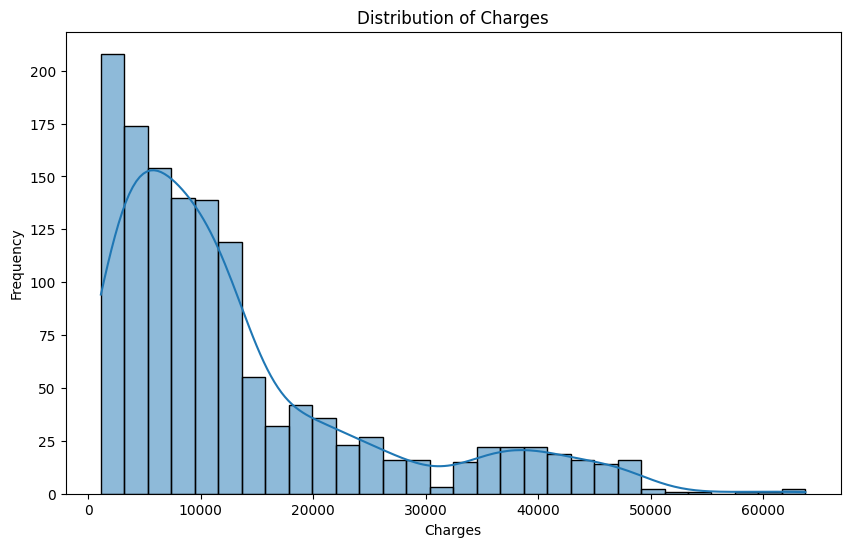

In [16]:
#Perform EDA and create meaningful visualisations
# Histogram of charges
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

### Boxplot of charges by smoker/non-smoker.

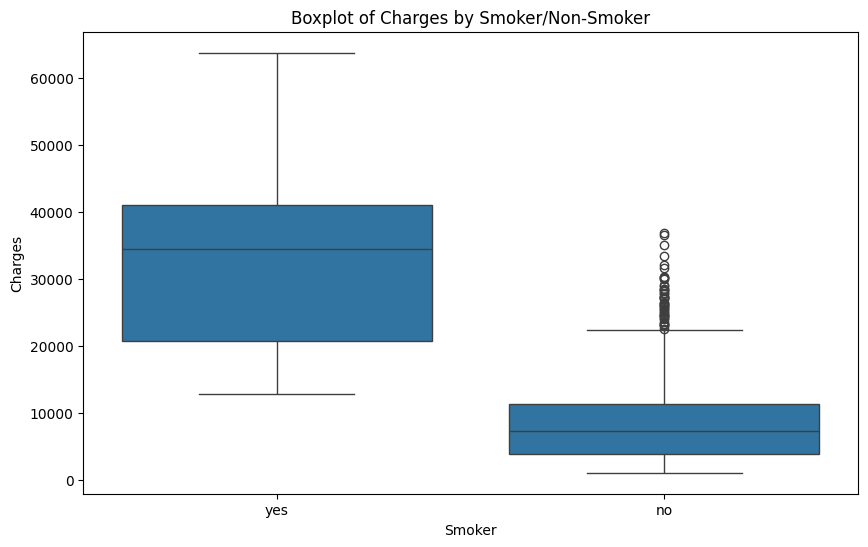

In [17]:
#Create Boxplot of charges by smoker/non-smoker.
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Boxplot of Charges by Smoker/Non-Smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

### Pair plot to observe relationships.

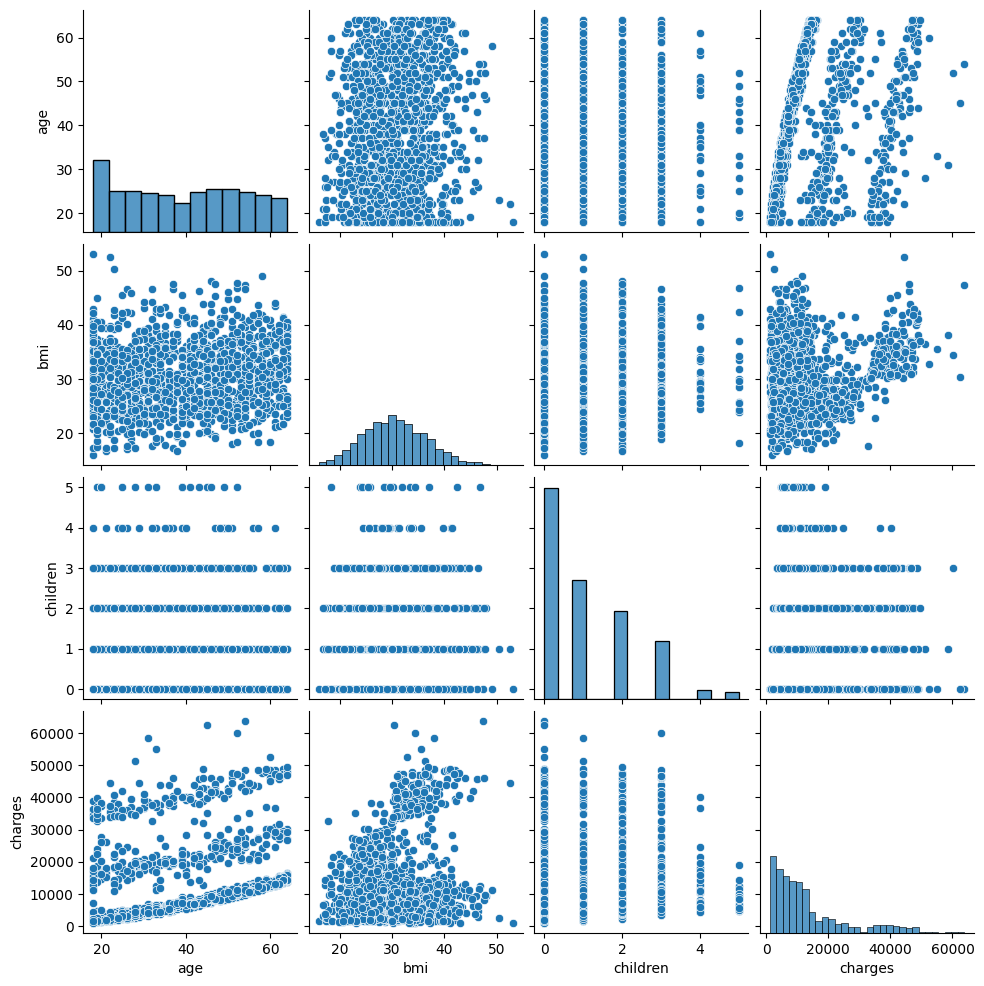

In [18]:
# Pair plot to observe relationships.
sns.pairplot(df)
plt.show()


### Observations
- Age vs. Charges:
  - There appears to be a positive linear relationship between age and charges, meaning that as age increases, the charges tend to increase as well.
- BMI vs. Charges:
    - There is a positive relationship between BMI and charges, although it appears less strong and with more scatter than the relationship between age and charges.
    - There also seems to be some clustering in this plot, particularly at higher charges, which might be related to other factors like smoking.
- Children vs. Charges:
    - There doesn't seem to be a clear linear relationship between the number of children and charges. The data is clustered at discrete values for children (0, 1, 2, etc.).
- Age, BMI, Children, and Categorical Variables (Sex, Smoker, Region):
    - The plots involving the categorical variables show how the numerical variables are distributed within each category.
    - For example, the plots of age vs. sex or bmi vs. smoker can reveal if there are differences in age or BMI between males and females or smokers and non-smokers.
Overall, the pair plot provides a good visual overview of the relationships between all pairs of variables in the dataset, helping to identify potential correlations and patterns that might be useful for building a linear regression model.

### Deliverables for Exercise 1:
- Cleaned dataset ready for modeling.

- EDA visualizations (matplotlib, seaborn).

- Brief report describing findings from data exploration.

## Exercise 2: Linear Regression Model & Evaluation (10 Marks)

### Objective:
- Train a linear regression model to predict medical charges and evaluate its performance.

### Instructions & Guidelines:
- Model Preparation:
- Split the data into training and testing sets (e.g., 80/20).

- Select appropriate features (e.g., age, sex, BMI, smoker, children, etc.).

- Use LinearRegression() from sklearn.linear_model.

### Model Training:

- Fit the model using training data.

- Output regression coefficients and intercept.

### Evaluation:
- Predict on the test set.

- Calculate evaluation metrics:

  -  Mean Absolute Error (MAE)

  -  Mean Squared Error (MSE)
  -  R2 Score

- Visualize:

  -  Actual vs. predicted charges scatter plot.

  -  Residuals plot.

Deliverables for Exercise 2:
- Well-commented Jupyter Notebook/Python script with the model and metrics.

- Output of coefficients and evaluation metrics.

- Charts to support insights.

- A short paragraph interpreting the model results.

### Portfolio Building Instructions
- Cleaned and prepared dataset file.

- Python script or notebook (.ipynb) with code and outputs.

- Visualizations for both EDA and regression results.

- PDF or Markdown report explaining your process and findings.

- Optional: Publish the project on GitHub and include a project summary.

### Documentation & Code Repository:

- Host your Python code and dashboard code in a public repository (e.g., GitHub) with
a clear README file.

- The README should include instructions on how to run the project, the file
structure, and highlights of your key findings.

### Presentation Polish:

- Organize your portfolio entry with clear headings, bullet points, and well-labeled
images.

- Write in clear, beginner-friendly language that explains your technical process and
business insights.

### Model Preparation:

- Split the data into training and testing sets (e.g., 80/20).

- Select appropriate features (e.g., age, sex, BMI, smoker, children, etc.).

- Use LinearRegression() from sklearn.linear_model.

In [23]:
# Encode categorical features using one-hot encoding and scale numerical features

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'df' is already loaded from the previous steps

# Encode categorical features using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Identify numerical columns (excluding the target variable 'charges' and the encoded categorical columns)
numerical_cols = ['age', 'bmi', 'children']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


#split the data into training and testing sets (80/20 split)

# Select features and target variable
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully.")

Data split into training and testing sets successfully.


In [21]:
# Encode categorical features using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Display the first few rows of the encoded DataFrame
display(df_encoded.head())

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [22]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding the target variable 'charges' and the encoded categorical columns)
numerical_cols = ['age', 'bmi', 'children']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the first few rows of the scaled DataFrame
display(df_encoded.head())

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,16884.92400,False,True,False,False,True
1,-1.509965,0.509621,-0.078767,1725.55230,True,False,False,True,False
2,-0.797954,0.383307,1.580926,4449.46200,True,False,False,True,False
3,-0.441948,-1.305531,-0.908614,21984.47061,True,False,True,False,False
4,-0.513149,-0.292556,-0.908614,3866.85520,True,False,True,False,False


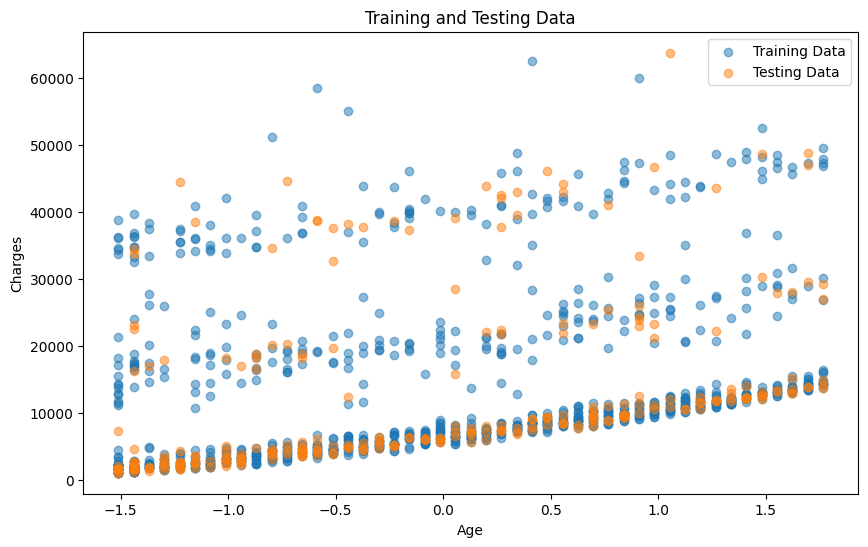

In [26]:
#Select appropriate features (e.g., age, sex, BMI, smoker, children, etc.)
# Use LinearRegression() from sklearn.linear_model.

from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plt.scatter(X_train['age'], y_train, label='Training Data', alpha=0.5)
plt.scatter(X_test['age'], y_test, label='Testing Data', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Training and Testing Data')
plt.legend()
plt.show()




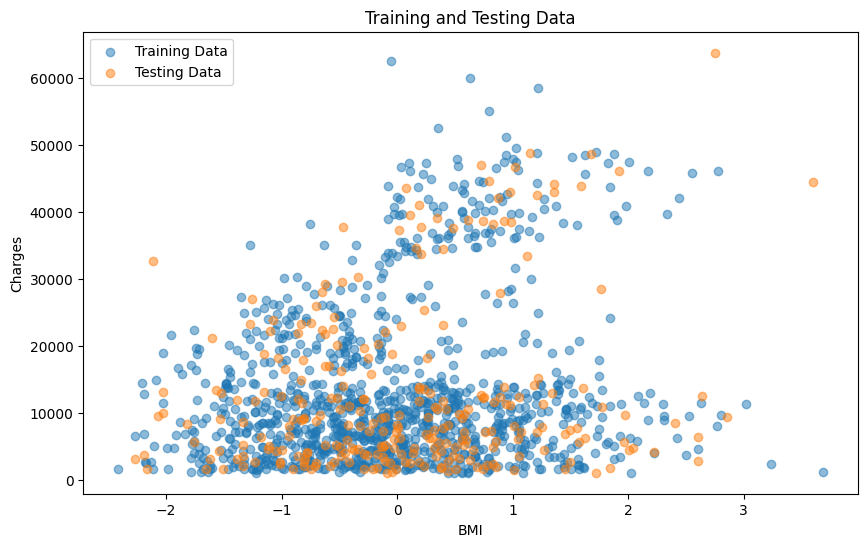

In [27]:
# Use LinearRegression() from sklearn.linear_model.

from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

#plot for bmi vs age
plt.figure(figsize=(10, 6))
plt.scatter(X_train['bmi'], y_train, label='Training Data', alpha=0.5)
plt.scatter(X_test['bmi'], y_test, label='Testing Data', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Training and Testing Data')
plt.legend()
plt.show()



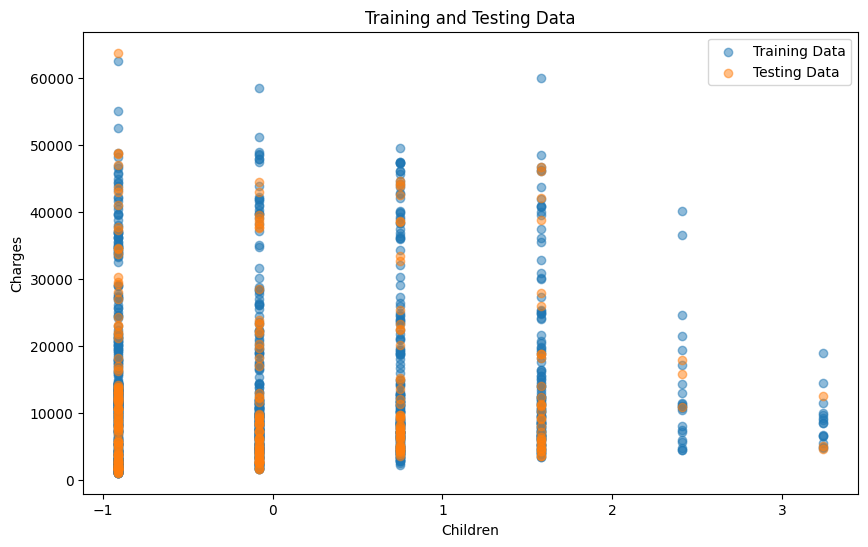

In [30]:

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

#plot for children
plt.figure(figsize=(10, 6))
plt.scatter(X_train['children'], y_train, label='Training Data', alpha=0.5)
plt.scatter(X_test['children'], y_test, label='Testing Data', alpha=0.5)
plt.xlabel('Children')
plt.ylabel('Charges')
plt.title('Training and Testing Data')
plt.legend()
plt.show()



In [ ]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

#plot for

# Medical Cost Personal Dataset - Linear Regression Project

This project focuses on applying linear regression to the "Medical Cost Personal Dataset" to predict individual medical insurance charges based on demographic and lifestyle factors. It serves as a portfolio piece demonstrating data cleaning, exploratory data analysis (EDA), and linear regression model building and evaluation.

## Dataset

The dataset used in this project is the "Medical Cost Personal Dataset", which contains information about individuals including:

*   **age**: Age of the primary beneficiary
*   **sex**: Insurance contractor gender, female or male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m^2) using the ratio of weight to square of height, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / number of dependents
*   **smoker**: Smoker or non-smoker
*   **region**: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

## Project Structure

The project is organized as follows:

*   `Medical_Cost_Linear_Regression.ipynb`: The main Jupyter Notebook containing all the code for data cleaning, EDA, model training, and evaluation.
*   `Insurance.csv`: The dataset file.

## How to Run the Project

1.  **Clone the repository:**

In [31]:
    cd Medical_Cost_Linear_Regression

[Errno 2] No such file or directory: 'Medical_Cost_Linear_Regression'
/content


In [32]:
    pip install pandas numpy matplotlib seaborn scikit-learn statsmodels warnings scipy

ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [33]:
    jupyter notebook Medical_Cost_Linear_Regression.ipynb

SyntaxError: invalid syntax (ipython-input-2521012279.py, line 1)